In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Least-Square Regression
+ Write a function that computes the pseudo-inverse of a matrix $X$ 

(Hint: you can use the `np.linalg.inv` function)

$X^+ = (X^T \cdot X)^{-1} \cdot X^T$


In [4]:
def pseudo_inverse(X):
    return(np.linalg.inv(X.T.dot(X)).dot(X.T))

+ Write a function that computes the Least-Square coefficients vector $c$ given a matrix $X$ and a vector $y$

     $c = X^+ \cdot y$


In [5]:
def least_square_coefficients(X,y):
    X_p_inv = pseudo_inverse(X)
    c = X_p_inv.dot(y)
    return(c)


+ Write a function that computes the Least-Square coefficients vector $c$ given a matrix $X$ and a vector $y$ using the SVD decomposition $X = U\cdot \Sigma \cdot V^T$
 
    (Hint: you can use the `np.linalg.svd` function)

    $c=V \cdot \Sigma^{-1} \cdot U^* \cdot y$

In [6]:
def least_square_coefficients_svd(X,y):
    U, s, Vs = np.linalg.svd(X, full_matrices=False)
    V = Vs.T
    U_y = U.T.dot(y)
    U_y_div_sigma = U_y*1./s
    c = V.dot(U_y_div_sigma)
    return(c)

+ Compute parameter vector $c$ using the QR factorization

normal equation : $X^* X c = X^* y$ 

QR factorization: $X = QR$

Then: $(QR)^*(QR) c = (QR)^* y$

$R^* Q^* Q R c = R^* Q^* y$

$R^* R c = R^* Q^* y$

If $X$ is full rank then $R$ is invertible

$Rc = Q^* y$

$c = R^{-1} Q^* y$

+ Write a function that computes the Least Squares parameter vector using the QR factorization

In [10]:
def least_squares_coefficients_qr(X,y):
    Q,R = np.linalg.qr(X)
    c = np.linalg.inv(R).dot(Q.T).dot(y)
    return c

## Toy dataset
+ Generate a toy dataset $x$ and $y$ s.t.:
    + $x = (0,0.001,0.002, ..., 1)$ (hint: use the `np.arange` function)
    + $y = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + r$ with:
        + $c_0 = 2$ 
        + $c_1 = 20$
        + $c_2 = 100$ 
        + $c_3 = 100$
        + $r \sim \mathcal{N}(0,10)$ (hint: use the `np.random.randn` function)
    + Generate $X = [x^0 | x^1 | x^2 | \dots | x^k]$ the truncated Vandermonde matrix (for $k$=3) (hint: use the `np.linalg.vander` function)

In [11]:
x = np.arange(0,1.001,0.001)
y = 2 + 20*x + 100*x**2 + 100*x**3 + np.random.randn(len(x))
X = np.vander(x,N=31, increasing=True)

+ Compute the least square vector $c$ with each one of the previous functions
+ Compute $\hat{y} = X^+ \cdot c$ the least-square model with each vector $c$
+ Plot $y = f(\hat{y})$ for each method
+ Test the same experiment for a Vandermonde matrix with $k=30$

In [12]:
c = least_square_coefficients(X,y)
c_svd = least_square_coefficients_svd(X,y)
c_qr = least_squares_coefficients_qr(X,y)

y_hat = X.dot(c)
y_hat_svd = X.dot(c_svd)
y_hat_qr = X.dot(c_qr)


Text(0, 0.5, '$\\hat{y}$ (pseudo-inverse)')

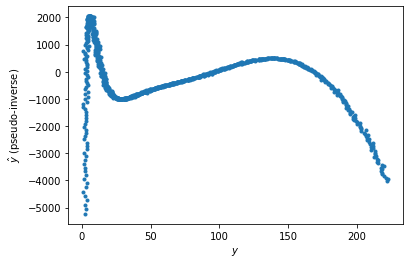

In [13]:
plt.plot(y,y_hat,".",label="Pseudo-Inverse")
plt.xlabel("$y$")
plt.ylabel("$\hat{y}$ (pseudo-inverse)")

Text(0, 0.5, '$\\hat{y}$ (SVD method)')

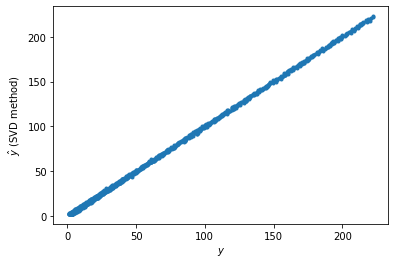

In [14]:
plt.plot(y,y_hat_svd,".",label="SVD")
plt.xlabel("$y$")
plt.ylabel("$\hat{y}$ (SVD method)")

Text(0, 0.5, '$\\hat{y}$ (QR method)')

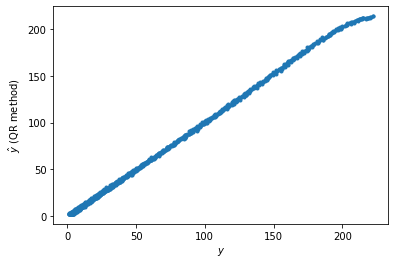

In [17]:
plt.plot(y,y_hat_qr,".",label="QR")
plt.xlabel("$y$")
plt.ylabel("$\hat{y}$ (QR method)")

+ Compute the runtimes for each method that aims at computing $c$

In [10]:
%timeit least_square_coefficients(X,y)


135 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit least_square_coefficients_svd(X,y)

1.13 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit least_squares_coefficients_qr(X,y)

532 µs ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit np.linalg.svd(X, full_matrices=False)

1.05 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%timeit np.linalg.qr(X)

455 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Transcription Factors gene expression

## Load dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

+ Load the "TFs_gene_expression_normalized.csv" dataset, as a matrix $X$, using the `pd.read_csv` function.

Each row represents a condition (groups of cells from a given tissues from different patients), and each column represents a gene encoding a transcription factor, and the value $X_{i,j}$ at row $i$ and column $j$ is simply the gene expression of gene $j$ in condition $i$

In [23]:
X = pd.read_csv("TFs_gene_expression_normalized.csv",index_col=0)
print(X.shape)
X.head()


(10000, 500)


,ZBTB7A,ZNF248,GTF2IRD2,CENPB,ZNF705G,MYCL,HNF4G,ZNF440,ADNP2,PAX5,...,TFE3,PBX4,GMEB1,FOXI3,ZNF704,ZNF773,NFKB1,ZBTB47,SPIB,MYB
GTEX-1F6RS-0226-SM-9MQKO,0.75,0.55,0.65,0.63,0.44,-0.79,-0.41,0.43,0.51,-0.27,...,1.47,0.53,1.14,-0.29,0.68,0.74,1.01,0.58,-0.48,-0.27
GTEX-1269C-2826-SM-5EQ5O,0.58,0.63,0.02,-0.49,-0.25,-0.83,-0.45,-1.12,0.17,-0.32,...,0.62,-1.03,-0.29,-0.29,1.59,-1.33,0.37,0.53,-0.32,-0.73
GTEX-14LZ3-0011-R1a-SM-69LP5,-0.90,-0.63,-1.09,0.62,1.62,-0.59,-0.40,-1.47,-1.68,-0.32,...,-2.24,-0.94,-1.91,-0.29,-0.20,-1.80,-1.67,0.47,-0.50,-0.72
GTEX-17HG3-2926-SM-79ON8,1.23,0.48,-0.94,-0.13,-0.25,-0.42,-0.14,-0.45,-0.49,-0.26,...,-0.06,-0.17,-0.98,0.08,0.10,-0.31,-1.57,0.63,-0.49,-0.49
GTEX-147F3-0726-SM-5NQ9U,-0.22,-0.42,0.31,0.61,-0.25,0.40,-0.37,0.88,0.86,-0.03,...,0.29,1.07,0.39,-0.29,0.69,0.41,0.21,-0.18,-0.30,0.13


+ In this work we will extract one of the gene expression vectors from a transcription (for example 'ZBTB7A', the so-called "pokemon") to form an observations vector $y$, and we will try to model its expression as a linear combination of the expression levels of other transcription factors in matrix $X$.

In [24]:
y = X["ZBTB7A"]
del X["ZBTB7A"]


In [25]:
X = X.values
y = y.values

+ Select randomly:
    + A fraction $\delta$ of the rows as training dataset to infer the coefficients
    + The remaining fraction $1-\delta$  of the rows as test set to compute the prediction error
    
Hint: use the `np.random.shuffle` function to shuffle a list containing the indexes of rows in $X$, and then simply take the first $2/3$ (respectively the last $1/3$) of this vector to build the training set (respectively the test set).

In [26]:
index = list(range(X.shape[0]))
np.random.shuffle(index)

In [27]:
L = len(index)
delta = 0.01#2/3

y_train = y[index[:int(L*delta)]]
y_test = y[index[int(L*delta):]]

X_train = X[index[:int(L*delta)],:]
X_test = X[index[int(L*delta):],:]

In [28]:
X_test.shape,X_train.shape,X.shape

((9900, 499), (100, 499), (10000, 499))

## Linear Regression 


+ Compute the linear least-square coefficients for the training set 

In [29]:
c = least_square_coefficients(X_train, y_train)

+ Compute the predictions on the training and test sets and plot them with respect to the real observations

Text(0, 0.5, '$\\hat{y}$')

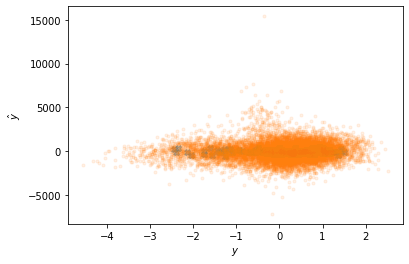

In [30]:
y_test_pred = X_test.dot(c)
y_train_pred = X_train.dot(c)

plt.plot(y_train, y_train_pred,"X",alpha=0.5)
plt.plot(y_test,y_test_pred,'.',alpha=0.1)

plt.xlabel("$y$")
plt.ylabel("$\hat{y}$")


Make a function that returns the prediction error: $||X_{test}\cdot c− y_{test}||_2^2$

In [31]:
def error(X,y,c):
    return np.sum((X.dot(c) - y)**2)

In [32]:
error(X_test,y_test,c),error(X_train,y_train,c)

(11380153851.106611, 4301020.608712837)

+ Plot the distribution of coefficients

(array([  3.,   5.,  20.,  47., 355.,  45.,  16.,   4.,   2.,   2.]),
 array([-660.7981427 , -513.880642  , -366.9631413 , -220.04564059,
         -73.12813989,   73.78936081,  220.70686151,  367.62436221,
         514.54186292,  661.45936362,  808.37686432]),
 <BarContainer object of 10 artists>)

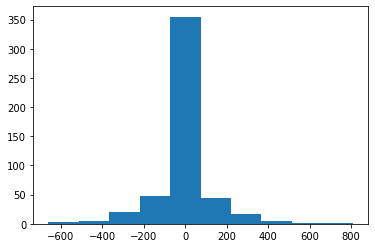

In [33]:
plt.hist(c)

## Tikhonov regularization (ridge regression)


In some real world cases, solving the least square linear regression problem by minimizing the residuals squared norm $Argmin_c || Xc - y ||^2_2$, may lead to undesirable solutions due to a tendency of amplifying noise.
In this context, a regularization term can be included in the to give preference to a particular solution with desirable properties.

$$Argmin_c || Xc - y ||^2_2 + ||\Gamma c||^2_2$$

Here $\Gamma$ is called the Tikhonov regularization matrix (often $\Gamma = \alpha I$).

+ Calculate the analytical solution for $c$




$$ c = (X^TX + \Gamma^T\Gamma)^{-1}X^T y$$



$$c = (X^TX + \alpha^2 I)^{-1}X^T y \quad , \text{if} \; \Gamma = \alpha I$$

+ Replace the matrix $X$ by its SVD and compute the previous analytical solution

$$c = V\Sigma(\Sigma^2 +\alpha^2I)^{-1}U^Ty \quad \text{if more rows than cols.}$$

$$c = (V\Sigma^2V^T + \alpha I)^{-1} V \Sigma U^T \quad \text{otherwise}$$



+ Make a function that receives as an input observations $y_{train}$ and conditions $X_{train}$ and compute the coefficients $c$ that minimizes

$$||X_{train}\cdot c - y_{train}||_2^2 + ||\alpha c||_2^2$$

In [34]:
def regression_tikhonov(X, y, alpha):
    c = np.linalg.inv((X.T.dot(X) + np.eye(X.shape[1])*alpha**2)).dot(X.T).dot(y)
    return(c)

def regression_tikhonov_svd(X, y, alpha):
    U, s, Vs = np.linalg.svd(X, full_matrices=False)
    V = Vs.T
    c = V.dot(np.eye(V.shape[0])*(s/(s**2 + alpha**2))).dot(U.T).dot(y)
    return(c)

In [35]:
u,s,v= np.linalg.svd(X_train, full_matrices=False)
u.shape,s.shape,v.shape

((100, 100), (100,), (100, 499))

+ Run the previous study using the Tikhonov regularization for different values of $\alpha$

In [36]:
c = regression_tikhonov(X_train, y_train, alpha=10)

Text(0, 0.5, '$\\hat{y}$')

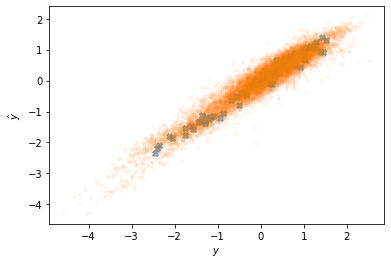

In [37]:
y_train_pred = X_train.dot(c)
y_test_pred = X_test.dot(c)
plt.plot(y_train, y_train_pred,"X",alpha=0.5)
plt.plot(y_test, y_test_pred,".",alpha=0.05)
plt.xlabel("$y$")
plt.ylabel("$\hat{y}$")

In [38]:
error(X_test,y_test,c),error(X_train,y_train,c)

(892.0141589445118, 2.7674153817842932)

+ Plot the distribution of coefficients

(array([  5.,  21.,  63., 116., 112., 110.,  41.,  23.,   5.,   3.]),
 array([-0.02623881, -0.01988497, -0.01353112, -0.00717728, -0.00082343,
         0.00553041,  0.01188426,  0.0182381 ,  0.02459195,  0.03094579,
         0.03729964]),
 <BarContainer object of 10 artists>)

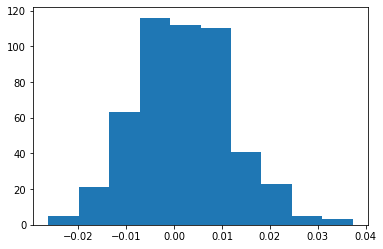

In [39]:
plt.hist(c)

+ In which case does the classic least-squares linear regression fail?

    If it is not possible to compute $(X^T X)^{-1}$


+ Does Tikhonov regularization solves this problem?

    Yes since $(X^T X + \alpha I)^{-1}$ exists


+ Set a value $\delta$ that would illustrate this phenomenon


In [40]:
delta = 0.01
X.shape, delta*10000

((10000, 499), 100.0)

## [Orthogonal Matching Pursuit (OMP)](https://angms.science/doc/RM/OMP.pdf)

The OMP is intended to find an approximate solution to the following problem:

$min _{c}\|y -X\cdot c\|_{2}^{2} \quad \text{ subject to } \quad \|c\|_{0}\leq N$

where $\|c\|_{0}$ is the $\ell_{0}$ pseudo-norm (i.e. the number of nonzero elements of $c$). 

The concept of OMP is related to statistical projection pursuit, in which "interesting" projections are found iteratively.

In practice the following algorithm is used:

### Algorithm Matching Pursuit
__Input__: $y\in \mathbb{R}^n$, $X\in \mathbb{R}^{n,p}$ 
+ __Initialization__ $r_0 = y$, $\Lambda_0 = \emptyset$
+ Normalize the columns of $X$ to unit $\ell_2$ norm
+ Remove duplicated columns in $X$ (make $X$ full rank)
+ __for__ $k = 1, \dots, N$:
    + $\lambda_k = argmax_{j \notin \Lambda_{k-1}} |\langle X_j, r_{k-1} \rangle|$
    + $\Lambda_k = \Lambda_{k-1} \cup \{ \lambda_k \}$
    + $c_k^{(i \in \Lambda_k)} = argmin_c \| X_{\Lambda_{k}}\cdot c - y \|_2^2;  \quad \text{and} \quad c_k^{(i\notin \Delta_k)} = 0$
    + $\hat{y_k} = X\cdot c_k$
    + $r \leftarrow y - \hat{y_k}$

__Return__ $c_N$

+ Program the OMP algorithm
+ Apply it to the Transcription Factors dataset with different values of $N$

## Bonus: Lasso Regression
+ Read about Lasso Regression, and explain how coefficients $c$ are computed
+ Test `scikit-learn` python library Lasso Regression implementation